In [12]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ── 1) Load Dataset ─────────────────────────────────────────────────────────
df = pd.read_csv("Toronto Island Ferry Ticket Counts.csv")

# View basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249635 entries, 0 to 249634
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   _id               249635 non-null  int64 
 1   Timestamp         249635 non-null  object
 2   Redemption Count  249635 non-null  int64 
 3   Sales Count       249635 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.6+ MB


,_id,Timestamp,Redemption Count,Sales Count
0,1,2025-07-14T20:45:00,55,74
1,2,2025-07-14T20:30:00,45,100
2,3,2025-07-14T20:15:00,43,47
3,4,2025-07-14T20:00:00,28,32
4,5,2025-07-14T19:45:00,48,59


✅ Step 2: Choose Two Stories to Visualize

Here are some ideas can use:

Visualization 1: Hourly Ferry Demand Trends
	•	Tool: Python (Matplotlib / Seaborn)
	•	Goal: Show daily/hourly patterns of ferry usage
	•	Audience: City planners, Parks & Rec officials
	•	Message: Peak ferry times could influence staffing/scheduling

Visualization 2: Destination Popularity Comparison
	•	Tool: Tableau Public or Excel
	•	Goal: Compare traffic to Centre Island vs Hanlan’s vs Ward’s
	•	Audience: General public, tourists
	•	Message: Help people choose the best destination and avoid crowds

In [14]:
#Step 3: Clean and Prepare Data: : Convert Timestamp and Extract Features

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort chronologically
df = df.sort_values('Timestamp')

# Extract hour, day, date
df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date
df['Day'] = df['Timestamp'].dt.day_name()

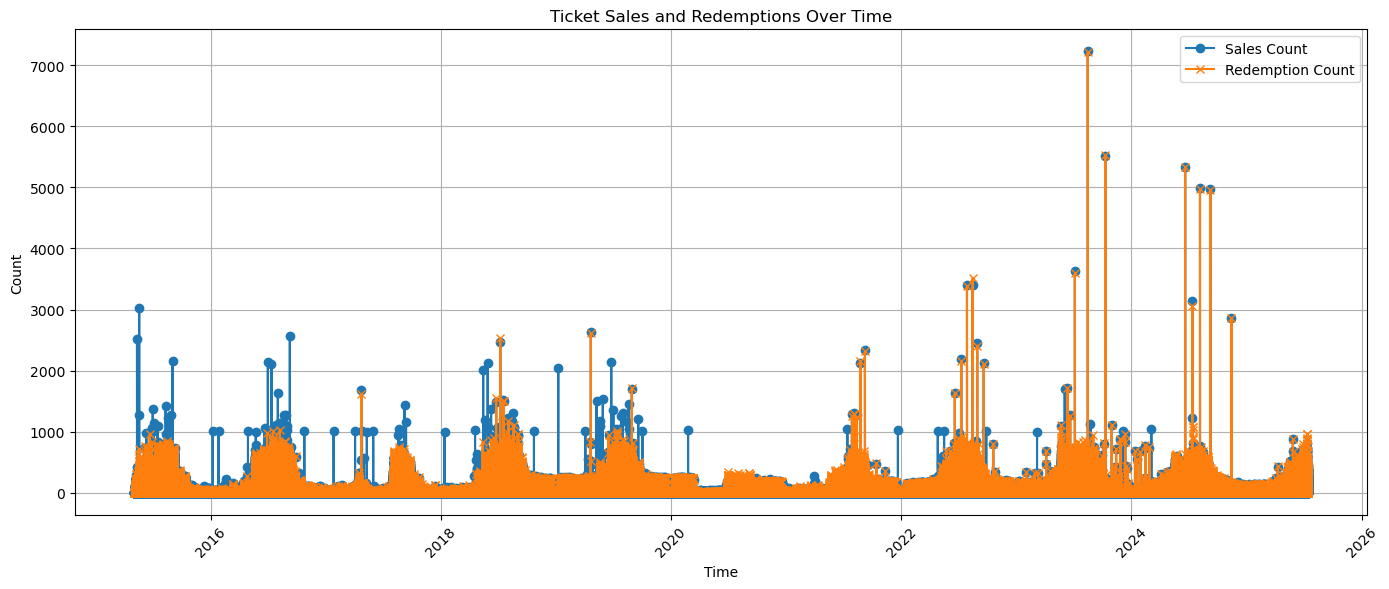

In [ ]:
# Visualization Idea 1: Sales vs Redemption Over Time (Line Plot): Show how ticket sales and redemptions behave through time.

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Timestamp'], df['Sales Count'], label='Sales Count', marker='o')
plt.plot(df['Timestamp'], df['Redemption Count'], label='Redemption Count', marker='x')
plt.title('Ticket Sales and Redemptions Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()




In [16]:
plt.savefig("sales_vs_redemption_lineplot.png", dpi=300)

<Figure size 640x480 with 0 Axes>

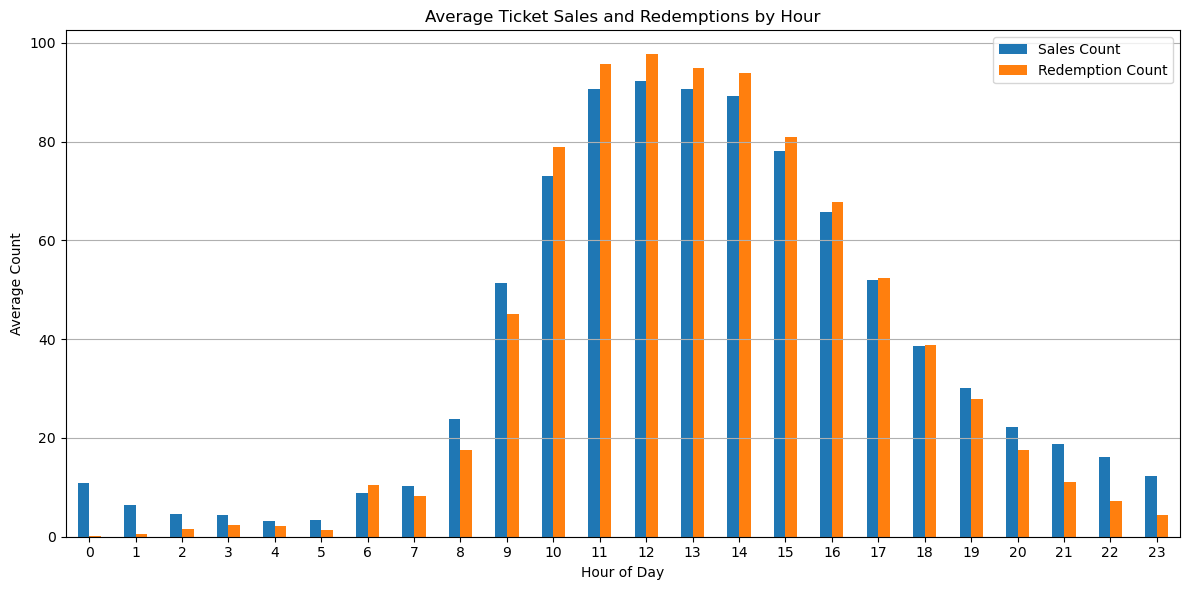

In [ ]:
# Visualization Idea 2: Average Count by Hour (Bar Chart)

# Group by hour
hourly_avg = df.groupby('Hour')[['Sales Count', 'Redemption Count']].mean().reset_index()

# Plot
hourly_avg.plot(x='Hour', kind='bar', figsize=(12,6))
plt.title("Average Ticket Sales and Redemptions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("avg_sales_redemption_by_hour.png", dpi=300)
plt.show()
